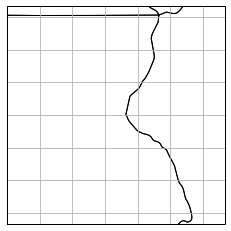

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np


# proj = ccrs.LambertConformal(central_latitude = 25, 
#                              central_longitude = 265, 
#                              standard_parallels = (25, 25))

# proj = ccrs.PlateCarree()
proj = ccrs.PlateCarree()

# Data and coordinates (from download link above)
# with np.load('nam_218_20120414_1200_006.npz') as nam:
#    dat = nam['dpc']
#    lat = nam['lat']
#    lon = nam['lon']

ax = plt.axes(projection = proj)
# ax.pcolormesh(lon, lat, dat, transform = ccrs.PlateCarree())
# ax.add_feature(cf.NaturalEarthFeature(
#                category='cultural',
#                name='admin_1_states_provinces_lines',
#                scale='10m',
#                facecolor='none'))


ax.coastlines('10m')
# ax.add_feature(cf.BORDERS)
ax.add_feature(cf.STATES.with_scale('10m'))

# The extent bounds are specified as an array [[x0, y0], [x1, y1]], 
# where x0 is the left side of the extent, y0 is the top, x1 is the right and y1 is the bottom.
# extent (x0, x1, y0, y1)
# extent = [-180,180, -90,90] # world
# extent = [-90, -30, 20, -60] # south america
# extent = [-74, -31, 5.5, -33] # brazil
# extent = [-53.5, -45, -11, -20] # brazil
extent = [-48, -47, -16, -17] # brazil
# extent = [-90, -30, 20, -60]
# extent = [-100, 30, 0, 80]
# extent = [-87.35, -79.5, 24.1, 30.8]


ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.gridlines()

plt.show()

In [1]:
# First: read the geotiff image with GDAL.
from osgeo import gdal, osr

gdal.UseExceptions()


fname = '/notebooks/resources/T22KHG_20190425T132241_TCI_smaller.tif'

ds = gdal.Open(fname)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print('\n\n## ds ##:\n\n' + str(ds))
print('\n\n## data ##:\n\n' + str(data))
print('\n\n## gt ##:\n\n' + str(gt))
print('\n\n## proj ##:\n\n' + str(proj))
print('\n\n## inproj ##:\n\n' + str(inproj))



## ds ##:

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f00185e8840> >


## data ##:

[[[28 28 28 ... 29 28 28]
  [27 29 29 ... 28 28 29]
  [29 32 31 ... 31 32 35]
  ...
  [47 47 46 ... 35 34 34]
  [46 46 48 ... 33 33 35]
  [46 46 48 ... 33 34 35]]

 [[46 47 50 ... 51 51 51]
  [46 47 49 ... 51 52 51]
  [48 50 52 ... 51 52 53]
  ...
  [58 57 57 ... 58 57 57]
  [57 57 57 ... 57 57 58]
  [58 57 57 ... 57 58 58]]

 [[53 54 54 ... 55 56 55]
  [54 55 55 ... 56 55 55]
  [55 57 57 ... 55 55 57]
  ...
  [62 61 61 ... 59 59 59]
  [61 61 61 ... 59 58 59]
  [62 61 60 ... 59 58 58]]]


## gt ##:

(885110.0, 10.0, 0.0, 8176910.0, 0.0, -10.0)


## proj ##:

PROJCS["WGS 84 / UTM zone 22S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Me